<a href="https://colab.research.google.com/github/clappingmin/deeplearning/blob/master/day01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf

dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

#######################################################

import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t',  sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

#######################################################
# 결측치 확인하기
dataset.isna().sum()

# 결측치 제거하기
dataset = dataset.dropna()

##############################################

# Origin열을 범주형 원-핫 엔코딩 변환
origin = dataset.pop('Origin')  # Origin컬럼을 삭제하고 origin에 보관

dataset['USA'] = (origin == 1) * 0.1
dataset['Europe'] = (origin == 2) * 0.1
dataset['Japan'] = (origin == 3) * 0.1


##############################################
# 80%로 분할하기
train_dataset = dataset.sample(frac=0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset


##############################################
# standardscale

trans_stats = train_dataset.describe()
trans_stats.pop("MPG")  # label에 속하는 항목은 제거
trans_stats = trans_stats.transpose()

#############################################
# train_dataset와 test_dataset에서 MPG항목만 labels로 옮김

train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

# train_dataset, train_labels, test_dataset, test_labels
############################################
# standard scale
def norm(x):
  return (x-trans_stats['mean']) / trans_stats['std']

train_dataset = norm(train_dataset)
train_dataset

test_dataset = norm(test_dataset)

#############################################
# 모델 생성
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]),
  layers.Dense(64, activation="relu"),
  layers.Dense(1)
])

model.summary()

###########################################
optimizer = tf.keras.optimizers.SGD(lr=0.01)
#회귀 : loss:mse로 지표(metrics)는 mae
model.compile(optimizer=optimizer, loss="mse", metrics=["mae", "mse"])

###########################################
#학습하기 1000
# validation_split=0.2
history = model.fit(train_dataset, train_labels, epochs=1000, validation_split=0.2)

history.history.keys()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 19ms/step - loss: 455.2430 - mae: 19.4933 - mse: 455.2430 - val_loss: 183.0893 - val_mae: 11.3550 - val_mse: 183.0893
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 211.9

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,455.243011,19.493290,455.243011,183.089294,11.354987,183.089294,0
1,211.967224,12.142350,211.967224,262.453430,14.389376,262.453430,1
2,110.964966,8.270107,110.964966,15.202570,3.135247,15.202570,2
3,26.698393,3.779571,26.698393,18.235312,3.263858,18.235312,3
4,38.453354,4.530128,38.453354,19.228006,3.133916,19.228006,4
...,...,...,...,...,...,...,...
995,0.464038,0.384452,0.464038,7.582271,2.211386,7.582271,995
996,0.664012,0.471737,0.664012,7.980059,2.275152,7.980059,996
997,1.624959,0.656666,1.624959,10.589282,2.528329,10.589282,997
998,4.900444,1.624340,4.900444,12.134035,2.623864,12.134035,998


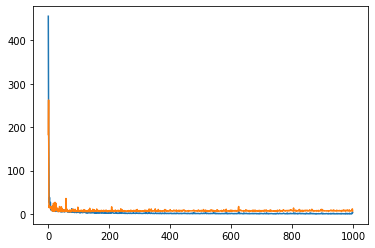

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], hist['mse'])
plt.plot(hist['epoch'], hist['val_mse'])
plt.show()


In [12]:
############################################
# 주택가격 예측하기_회귀
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
train_X

# 보스턴 주택 가격 데이터세트는 1978년 미국 보스턴 지역의 주택 가격으로,
# [01]  CRIM 자치시(town) 별 1인당 범죄율  
# [02]  ZN 25,000 평방피트를 초과하는 거주지역의 비율  
# [03]  INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
# [04]  CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) 
# [05]  NOX 10ppm 당 농축 일산화질소 
# [06]  RM 주택 1가구당 평균 방의 개수  
# [07]  AGE 1940년 이전에 건축된 소유주택의 비율
# [08]  DIS 5개의 보스턴 직업센터까지의 접근성 지수 
# [09]  RAD 방사형 도로까지의 접근성 지수 
# [10]  TAX 10,000 달러 당 재산세율 
# [11]  PTRATIO 자치시(town)별 학생/교사 비율  
# [12]  B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
# [13]  LSTAT 모집단의 하위계층의 비율(%) 
# [14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 1.4949 - mse: 1.4949 - val_loss: 0.6229 - val_mse: 0.6229
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.5041 - val_mse: 0.5041
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2916 - mse: 0.2916 - val_loss: 0.3445 - val_

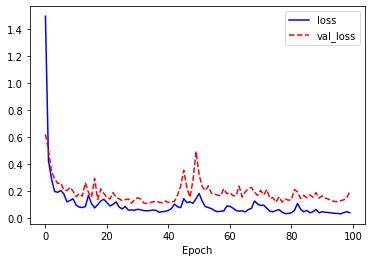

In [13]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data = scaler.fit_transform(train_X)
# data[0]

x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)

train_X = train_X - x_mean
train_X = train_X / x_std

test_X = test_X - x_mean
test_X = test_X / x_std

###################################
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)

train_Y = train_Y - y_mean
train_Y = train_Y / y_std

test_Y = test_Y - y_mean
test_Y = test_Y / y_std

###################################

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse', metrics="mse")
model.summary()

##################################

tf.keras.utils.plot_model(model)

##################################

history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25, verbose=1)

history.history.keys()

##################################

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
#학습하다가 val_loss가 3회 최적화 되지 않으면 종료됨.
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])


# 가중치 확인
model.weights


Epoch 1/25
10/10 [==============================] - 0s 6ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.1741 - val_mse: 0.1741
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.2184 - val_mse: 0.2184
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0499 - mse: 0.0499 - val_loss: 0.1854 - val_mse: 0.1854


[<tf.Variable 'dense_16/kernel:0' shape=(13, 64) dtype=float32, numpy=
 array([[ 3.11587334e-01, -3.02802026e-01,  2.24360619e-02,
         -4.03334498e-02, -4.03468072e-01, -2.03630075e-01,
          5.04090637e-02, -7.05856159e-02, -5.93305938e-02,
         -5.73949106e-02, -6.57015219e-02, -1.46281213e-01,
          1.12360537e+00, -6.93396330e-01, -2.47183815e-01,
         -4.38190550e-01, -4.80601013e-01, -9.39331353e-01,
         -3.35036218e-01, -2.72823989e-01,  3.02555650e-01,
         -3.12741548e-01,  5.93677089e-02, -6.20862126e-01,
          5.07067502e-01, -3.02027792e-01,  2.53087189e-02,
         -2.99342155e-01, -4.08691883e-01,  1.02317199e-01,
         -1.03327000e+00, -1.97697029e-01,  7.09398985e-02,
         -3.78502347e-02, -1.59663424e-01, -2.97652394e-01,
         -3.34785700e-01,  6.32219091e-02, -2.82438308e-01,
         -6.50296211e-01, -3.09667289e-01, -2.24722266e-01,
          6.35855734e-01, -1.86311662e-01, -9.51990858e-02,
         -2.41552055e-01, -5.

In [15]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


# fixed acidity	고정산, 와인의 산도를 제어								
# volatile acidity	휘발산, 와인의 향과 연관									
# citric acid	구연산, 와인의 신선함을 올림								
# residual sugar	잔여 당분, 와인의 단 맛 올림								
# chlorides	염화물, 와인의 짠 맛의 원인								
# free sulfur dioxide	황 화합물, 와인을 오래 보관하게 함							
# total sulfur dioxide	황 화합물, 와인을 오래 보관하게 함								
# density	밀도, 와인의 무게감을 나타냄							
# pH	산성도, 와인의 신 맛의 정도								
# sulphates	황 화합물, 와인을 오래 보관하게 함								
# alcohol	알코올, 와인의 단 맛과 무게감에 영향							
# quality	와인의 품질	3,4,5,6,7,8	

# 실습문제
# red 와인은 0, white 와인은 1로 type컬럼에 추가하시오.
# red와 white를 합치시오. concat 사용
# red와 white의 각각의 개수를 구하시오.
# minmaxscale로 정규화하시오.
# 데이터를 섞은 후 80:20으로 분할 하시오. train_X, test_X, train_Y, test_Y
# numpy 배열로 변환하시오. ( to_numpy()사용 )

#==========================================

# train_Y, test_Y는 원핫 인코딩으로 변환하시오.
# 모델생성.... 

In [17]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
red['type']=0

In [20]:
red.sample(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
591,6.6,0.39,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6,0
750,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,0
922,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6,0
936,8.8,0.30,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8,6,0
1324,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6,0
967,8.5,0.66,0.20,2.1,0.097,23.0,113.0,0.99733,3.13,0.48,9.2,5,0


In [22]:
white['type']=1
white.sample(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
45,7.4,0.180,0.31,1.40,0.058,38.0,167.0,0.99310,3.16,0.53,10.0,7,1
1251,5.7,0.245,0.33,1.10,0.049,28.0,150.0,0.99270,3.13,0.42,9.3,5,1
4046,7.2,0.170,0.28,17.55,0.050,33.0,154.0,0.99971,2.94,0.43,9.0,7,1
3574,8.1,0.170,0.21,1.60,0.036,24.0,119.0,0.99396,3.18,0.52,10.1,6,1
208,6.8,0.570,0.29,2.20,0.040,15.0,77.0,0.99380,3.32,0.74,10.2,5,1
2085,7.9,0.170,0.32,1.60,0.053,47.0,150.0,0.99480,3.29,0.76,9.6,6,1


In [23]:
wine = pd.concat([red, white], axis=0)

In [75]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [37]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [65]:
wine['type'][wine['type']==1].count()

4898

In [66]:
wine['type'][wine['type']==0].count()

1599

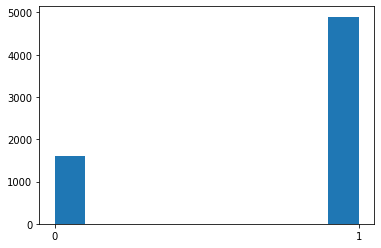

In [77]:
wine['type'].value_counts()

import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

In [78]:
# 최소값이 0 최대값1로 스케일
# type 0 1
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm

# 데이터 섞기
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)  # frac=1은 100% 즉 모든 데이터를 뽑아서 썪는다.

# 넘파이
wine_np = wine_shuffle.to_numpy()  # numpy로 변경하기

In [79]:
#80%로 나누기
train_idx = int(len(wine_np) * 0.8)

train_X = wine_np[:train_idx, :-1]
train_Y = wine_np[:train_idx, -1]

test_X = wine_np[train_idx:, :-1]
test_Y = wine_np[train_idx:, -1]

In [80]:
# 원핫
import tensorflow as tf

# num_classes 는 종류 : 지금은 0과 1만 있음.
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2) 
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)

train_Y[4:30] # 확인용

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

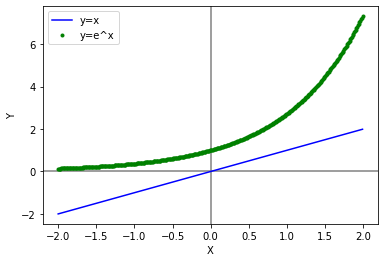

In [81]:
# softmax
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [82]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),   
  tf.keras.layers.Dense(units=12, activation='relu') ,
  tf.keras.layers.Dense(units=2, activation='softmax')   #2는 구하고자 하는 개수            
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_20 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_21 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [86]:
# 분류하고자 하는 label값이 원핫 일경우  : categorical_crossentropy
# 측정지표 = accuracy
optimizer = tf.keras.optimizers.Adam(lr=0.04) #최적화 함수 : Adam
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.9446 - val_loss: 0.0368 - val_accuracy: 0.9931
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9833 - val_loss: 0.0477 - val_accuracy: 0.9931
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9859 - val_loss: 0.0265 - val_accuracy: 0.9923
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9885 - val_loss: 0.0293 - val_accuracy: 0.9908
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9808 - val_loss: 0.0261 - val_accuracy: 0.9931
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9877 - val_loss: 0.0517 - val_accuracy: 0.9815
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9885 - val_loss: 0.0171 - val_accuracy: 0.9938
Epoch 

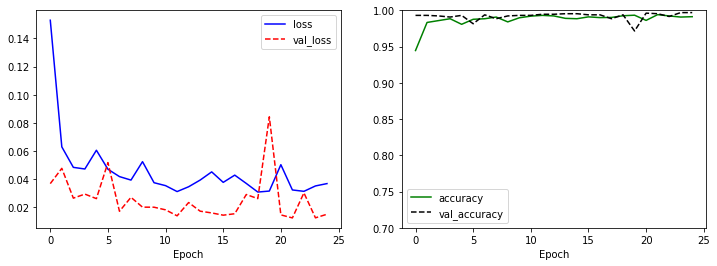

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [92]:
# 모델 평가
model.evaluate(test_X, test_Y) #학습 안한걸로 평가해야 한다.

41/41 [==============================] - 0s 860us/step - loss: 0.0267 - accuracy: 0.9900


[0.026748722419142723, 0.9900000095367432]

In [90]:
###############################################
import numpy as np
# 훈련된 모델로 예측값 수행
results = model.predict(test_X)

# 예측값 중에서 가장 큰 값의 인덱스값을 b에 넣음
b = np.argmax(results, axis=-1)

print(b[:10])  # 예측한 값의 결과
print(test_Y[:10])  # 실제 값의 결과

[1 1 1 1 1 0 1 0 1 1]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [94]:
#상:7~9
#중:6
#하:3~5
#품질 예측 모델 만들기